## Data preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Read the CSV file and create a DataFrame
df = pd.read_csv('data/sales_train_evaluation.csv')

df.to_pickle('data/sales_train_evaluation.pkl')

In [4]:
df = pd.read_pickle('data/sales_train_evaluation.pkl')
df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [5]:
# Supprimer les colonnes non nécessaires pour la matrice
df_demand = df.drop(columns=['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])

# Transformer en format pivoté : produits (id) en lignes, jours (d_1, d_2, ...) en colonnes
demand_matrix = df_demand.set_index('id')

In [6]:
print(demand_matrix.dtypes)
print(demand_matrix.info(memory_usage='deep'))
# Get the column names except for "id"
columns = demand_matrix.columns[demand_matrix.columns != 'id']

# Iterate over the columns and convert the data type
for column in columns:
    demand_matrix[column] = pd.to_numeric(demand_matrix[column], downcast='integer')

# Check the new data types
print(demand_matrix.dtypes)
print(demand_matrix.info(memory_usage='deep'))

d_1       int64
d_2       int64
d_3       int64
d_4       int64
d_5       int64
          ...  
d_1937    int64
d_1938    int64
d_1939    int64
d_1940    int64
d_1941    int64
Length: 1941, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 30490 entries, HOBBIES_1_001_CA_1_evaluation to FOODS_3_827_WI_3_evaluation
Columns: 1941 entries, d_1 to d_1941
dtypes: int64(1941)
memory usage: 454.0 MB
None
d_1       int16
d_2       int16
d_3       int16
d_4       int16
d_5       int16
          ...  
d_1937     int8
d_1938     int8
d_1939     int8
d_1940    int16
d_1941     int8
Length: 1941, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 30490 entries, HOBBIES_1_001_CA_1_evaluation to FOODS_3_827_WI_3_evaluation
Columns: 1941 entries, d_1 to d_1941
dtypes: int16(1299), int8(642)
memory usage: 96.7 MB
None


In [7]:
# Afficher un aperçu
print("Matrice des demandes :")
print(demand_matrix.head())

Matrice des demandes :
                               d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  \
id                                                                           
HOBBIES_1_001_CA_1_evaluation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_002_CA_1_evaluation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_003_CA_1_evaluation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_004_CA_1_evaluation    0    0    0    0    0    0    0    0    0   
HOBBIES_1_005_CA_1_evaluation    0    0    0    0    0    0    0    0    0   

                               d_10  ...  d_1932  d_1933  d_1934  d_1935  \
id                                   ...                                   
HOBBIES_1_001_CA_1_evaluation     0  ...       2       4       0       0   
HOBBIES_1_002_CA_1_evaluation     0  ...       0       1       2       1   
HOBBIES_1_003_CA_1_evaluation     0  ...       1       0       2       0   
HOBBIES_1_004_CA_1_evaluation     0  ...       1  

# Forecast Computing

Forecast computed on the average of the three lasts day sales

In [8]:
# Calculer la moyenne mobile des trois derniers jours
forecast_matrix = demand_matrix.T.rolling(window=3).mean().shift(1).T

# Arrondir les prévisions vers le haut
forecast_matrix = np.ceil(forecast_matrix)

In [9]:
# Afficher un aperçu
print("Matrice des prévisions (Forecast) :")
print(forecast_matrix.head())

Matrice des prévisions (Forecast) :
                               d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  \
id                                                                           
HOBBIES_1_001_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   
HOBBIES_1_002_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   
HOBBIES_1_003_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   
HOBBIES_1_004_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   
HOBBIES_1_005_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   

                               d_10  ...  d_1932  d_1933  d_1934  d_1935  \
id                                   ...                                   
HOBBIES_1_001_CA_1_evaluation   0.0  ...     1.0     1.0     2.0     2.0   
HOBBIES_1_002_CA_1_evaluation   0.0  ...     0.0     0.0     1.0     1.0   
HOBBIES_1_003_CA_1_evaluation   0.0  ...     1.0     1.0     1.0     1.0   
HOBBIES_1_004_CA_1_evaluation   0.0  

# Up-to-level

In [10]:
up_to_level_matrix = forecast_matrix.T.shift(-2).rolling(window=3).sum().T

In [11]:
# Afficher un aperçu
print("Matrice du niveau à atteindre (up_to_level_matrix) :")
print(up_to_level_matrix.head())

Matrice du niveau à atteindre (up_to_level_matrix) :
                               d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  \
id                                                                           
HOBBIES_1_001_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   
HOBBIES_1_002_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   
HOBBIES_1_003_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   
HOBBIES_1_004_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   
HOBBIES_1_005_CA_1_evaluation  NaN  NaN  NaN  0.0  0.0  0.0  0.0  0.0  0.0   

                               d_10  ...  d_1932  d_1933  d_1934  d_1935  \
id                                   ...                                   
HOBBIES_1_001_CA_1_evaluation   0.0  ...     4.0     5.0     6.0     4.0   
HOBBIES_1_002_CA_1_evaluation   0.0  ...     1.0     2.0     4.0     5.0   
HOBBIES_1_003_CA_1_evaluation   0.0  ...     3.0     3.0     3.0     3.0   
HOBBIES_1_004_CA_1_e

# Inventory

In [39]:
# Conversion vers arrays
demand = demand_matrix.to_numpy()
up_to_level = up_to_level_matrix.to_numpy()
n_products, n_days = demand.shape

# Initialisation des arrays
inventory_begin = np.zeros_like(demand)
inventory_end = np.zeros_like(demand)
T1 = np.zeros_like(demand)
T2 = np.zeros_like(demand)
sales = np.zeros_like(demand)
lost_sales = np.zeros_like(demand)

# Initialisation jour 0
inventory_begin[:, 0] = 5
T1[:, 0] = 0
T2[:, 0] = up_to_level[:, 0] - inventory_begin[:, 0]
inventory_end[:, 0] = np.maximum(inventory_begin[:, 0] - demand[:, 0], 0)
sales[:, 0] = inventory_begin[:, 0] - inventory_end[:, 0]
lost_sales[:, 0] = np.maximum(demand[:, 0] - sales[:, 0], 0)

# Boucle vectorisée jour par jour
for day in range(1, n_days):
    T1[:, day] = T2[:, day - 1]
    inventory_begin[:, day] = inventory_end[:, day - 1] + T1[:, day - 1]
    inventory_end[:, day] = np.maximum(inventory_begin[:, day] - demand[:, day], 0)
    T2[:, day] = np.maximum(up_to_level[:, day] - inventory_end[:, day] - T1[:, day], 0)
    sales[:, day] = inventory_begin[:, day] - inventory_end[:, day]
    lost_sales[:, day] = np.maximum(demand[:, day] - sales[:, day], 0)

# Reconvertir en DataFrames si besoin
columns = demand_matrix.columns
index = demand_matrix.index

inventory_begin_matrix = pd.DataFrame(inventory_begin, index=index, columns=columns)
inventory_end_matrix = pd.DataFrame(inventory_end, index=index, columns=columns)
T1_matrix = pd.DataFrame(T1, index=index, columns=columns)
T2_matrix = pd.DataFrame(T2, index=index, columns=columns)
sales_matrix = pd.DataFrame(sales, index=index, columns=columns)
lost_sales_matrix = pd.DataFrame(lost_sales, index=index, columns=columns)

/tmp/ipykernel_127571/1650975169.py:17: RuntimeWarning: invalid value encountered in cast
  T2[:, 0] = up_to_level[:, 0] - inventory_begin[:, 0]
/tmp/ipykernel_127571/1650975169.py:27: RuntimeWarning: invalid value encountered in cast
  T2[:, day] = np.maximum(up_to_level[:, day] - inventory_end[:, day] - T1[:, day], 0)


In [40]:
# Afficher un aperçu
print("Inventory begin:")
print(inventory_begin_matrix.head())

print("Inventory end:")
print(inventory_end_matrix.head())

print("T1:")
print(T1_matrix.head())

print("T2:")
print(T2_matrix.head())

print("Sales:")
print(sales_matrix.head())

print("Lost sales:")
print(lost_sales_matrix.head())

Inventory begin:
                               d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  \
id                                                                           
HOBBIES_1_001_CA_1_evaluation    5    5    5    5    5    5    5    5    5   
HOBBIES_1_002_CA_1_evaluation    5    5    5    5    5    5    5    5    5   
HOBBIES_1_003_CA_1_evaluation    5    5    5    5    5    5    5    5    5   
HOBBIES_1_004_CA_1_evaluation    5    5    5    5    5    5    5    5    5   
HOBBIES_1_005_CA_1_evaluation    5    5    5    5    5    5    5    5    5   

                               d_10  ...  d_1932  d_1933  d_1934  d_1935  \
id                                   ...                                   
HOBBIES_1_001_CA_1_evaluation     5  ...       5       3       1       5   
HOBBIES_1_002_CA_1_evaluation     5  ...       3       3       2       0   
HOBBIES_1_003_CA_1_evaluation     5  ...       4       3       3       1   
HOBBIES_1_004_CA_1_evaluation     5  ...       6       5

# Safety stock

# Performance metrics

In [41]:
fill_rate = 1 - lost_sales.sum().sum() / demand.sum().sum()
avg_inventory = (inventory_begin_matrix.sum().sum() + inventory_end_matrix.sum().sum()) / 2 // n_days
perfect_service_days_ratio = (lost_sales_matrix.sum(axis=0) == 0).mean()
print(f"Fill rate: {fill_rate:.2%}")
print(f"Average inventory: {avg_inventory:.2f}")
print(f"Perfect service days: {perfect_service_days_ratio:.2%}")


Fill rate: 92.52%
Average inventory: 158159.00
Perfect service days: 0.26%


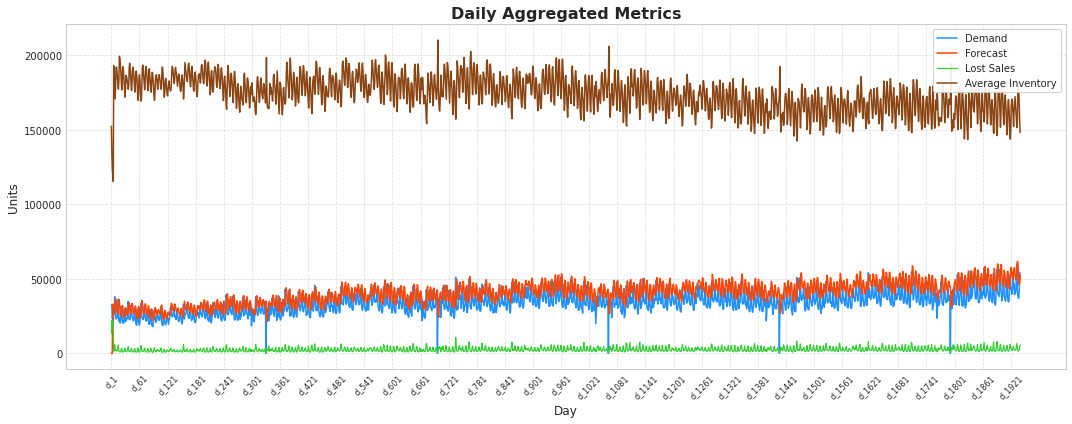

In [47]:
import matplotlib.pyplot as plt

# Agrégation
total_demand = demand_matrix.sum(axis=0)
total_forecast = forecast_matrix.sum(axis=0)
total_inventory = inventory_begin_matrix.sum(axis=0)
total_lost_sales = lost_sales_matrix.sum(axis=0)

# Paramètres de style
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 6))

# Tracés
plt.plot(total_demand, label='Demand', color='dodgerblue', linewidth=1.5)
plt.plot(total_forecast, label='Forecast', color='orangered', linewidth=1.5)
plt.plot(total_lost_sales, label='Lost Sales', color='limegreen', linewidth=1.2)
plt.plot(total_inventory, label='Average Inventory', color='saddlebrown', linewidth=1.5)

# Améliorations visuelles
plt.title('Daily Aggregated Metrics', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Units', fontsize=12)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', frameon=True, framealpha=0.9)

# Limiter les xticks pour lisibilité
xtick_interval = 60  # afficher 1 tick tous les 60 jours
plt.xticks(ticks=range(0, len(total_demand), xtick_interval),
           labels=total_demand.index[::xtick_interval], rotation=45)

plt.tight_layout()
plt.show()
rolling_window = 7  # une semaine





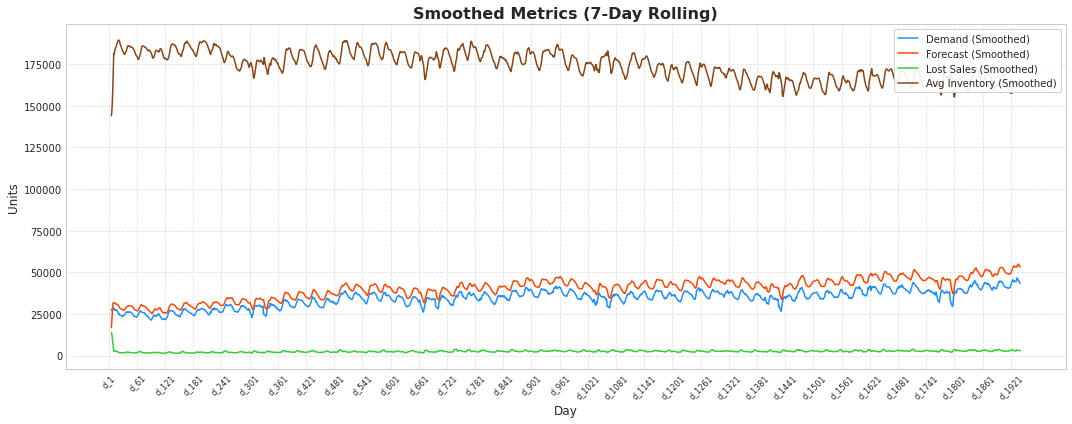

In [50]:
# Agrégation
total_demand = demand_matrix.sum(axis=0)
total_forecast = forecast_matrix.sum(axis=0)
total_inventory = inventory_begin_matrix.sum(axis=0)
total_lost_sales = lost_sales_matrix.sum(axis=0)

# Paramètres de style
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 6))

# Tracés
plt.plot(smoothed_demand, label='Demand (Smoothed)', color='dodgerblue')
plt.plot(smoothed_forecast, label='Forecast (Smoothed)', color='orangered')
plt.plot(smoothed_lost_sales, label='Lost Sales (Smoothed)', color='limegreen')
plt.plot(smoothed_inventory, label='Avg Inventory (Smoothed)', color='saddlebrown')


# Améliorations visuelles
plt.title('Smoothed Metrics (7-Day Rolling)', fontsize=16, fontweight='bold')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Units', fontsize=12)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', frameon=True, framealpha=0.9)

# Limiter les xticks pour lisibilité
xtick_interval = 60  # afficher 1 tick tous les 60 jours
plt.xticks(ticks=range(0, len(total_demand), xtick_interval),
           labels=total_demand.index[::xtick_interval], rotation=45)

plt.tight_layout()
plt.show()
rolling_window = 7  # une semaine
